# Data Sampling from Marchetti etl. al 2021

The results published by Marchetti et. al 2021 consist of the grain size information for the sand banks along the Po river in Italy.

The dataset used here has first been processed in QGIS to extract the centroids of each raster data point and then convert those to EPSG4326. These data points are then extracted along with their D50 values and stored in a CSV file. 

We further process that CSV file to conduct a stratified random sampling of sub-points that we use in other analysis

In [6]:
import numpy as np
import pystac_client
import planetary_computer
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
df = pd.read_csv('../../data/Marchetti-2021-regression-output.csv')
df

,D50,lon,lat
0,31.491240,7.896412,45.182873
1,31.491240,7.896412,45.182783
2,32.134602,7.896285,45.182693
3,36.287048,7.920829,45.182064
4,37.224495,7.918540,45.181974
...,...,...,...
40426,2.867297,10.361710,44.963835
40427,4.460123,10.361837,44.963835
40428,8.240463,10.361964,44.963835
40429,8.189078,10.361328,44.963746


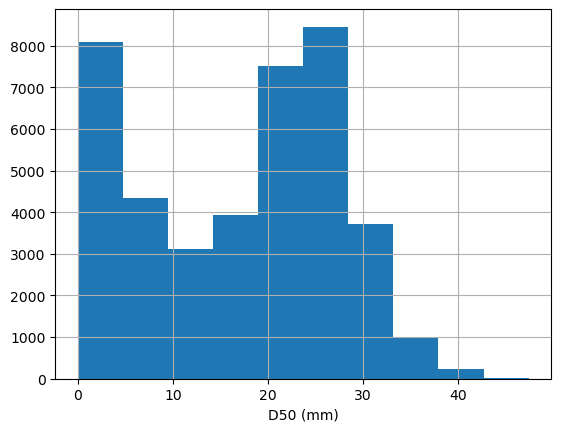

In [5]:
df['D50'].hist()
plt.xlabel('D50 (mm)')
plt.show()

## Set dates

"drone flights were conducted on 20 and 21 September 2018 in the Po and Sesia rivers, respectively (sites P1 and S1, Figure 1) and on 23 and 24 October 2018 in the Bonamico River (sites B1 and B2, Figure 1). Dates of flight were characterized by sunny and dry conditions"

In [8]:
sampling_date = '2018-09-22' #took median date

sampling_date = datetime.strptime(sampling_date, '%Y-%m-%d').date()

df['date'] = sampling_date
df


,D50,lon,lat,date
0,31.491240,7.896412,45.182873,2018-09-22
1,31.491240,7.896412,45.182783,2018-09-22
2,32.134602,7.896285,45.182693,2018-09-22
3,36.287048,7.920829,45.182064,2018-09-22
4,37.224495,7.918540,45.181974,2018-09-22
...,...,...,...,...
40426,2.867297,10.361710,44.963835,2018-09-22
40427,4.460123,10.361837,44.963835,2018-09-22
40428,8.240463,10.361964,44.963835,2018-09-22
40429,8.189078,10.361328,44.963746,2018-09-22


# Conduct Stratified Random Sampling

## First separate into classes according to the wentworth scale

![WC](../../img/wentworth.png)

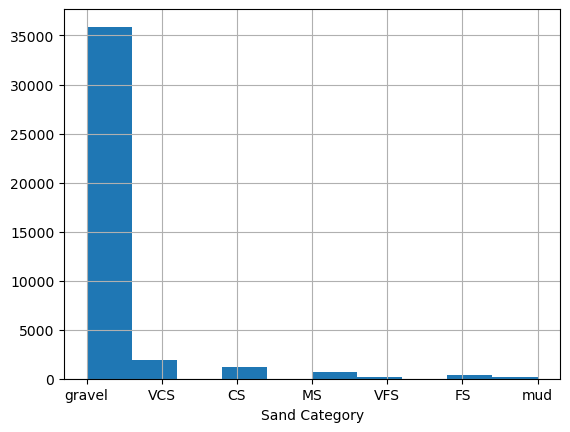

In [11]:
bins = [0, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 250.,]
labels = ['mud', 'VFS','FS','MS','CS','VCS','gravel']
df['category'] = pd.cut(x = df['D50'], bins = bins, labels = labels, include_lowest = True)
df['category'].hist()
plt.xlabel('Sand Category')
plt.show()

Sample N observations from each category

In [22]:
marchett_sample = df.groupby('category', group_keys=False).apply(lambda x: x.sample(10)).copy()
marchett_sample

,D50,lon,lat,date,category
37129,0.038682,10.158621,45.036219,2018-09-22,mud
38395,0.046198,10.242807,45.026508,2018-09-22,mud
38332,0.042253,10.245731,45.026687,2018-09-22,mud
35970,0.020613,10.037174,45.080278,2018-09-22,mud
37122,0.021452,10.158875,45.036309,2018-09-22,mud
...,...,...,...,...,...
8288,22.594687,8.582997,45.128474,2018-09-22,gravel
16408,19.872885,9.007106,45.084324,2018-09-22,gravel
8547,31.580414,8.587448,45.116245,2018-09-22,gravel
16427,12.552355,9.030632,45.084324,2018-09-22,gravel


In [23]:
len(marchett_sample)

70

In [24]:
marchett_sample.index.name = 'objectid'
marchett_sample

,D50,lon,lat,date,category
objectid,,,,,
37129,0.038682,10.158621,45.036219,2018-09-22,mud
38395,0.046198,10.242807,45.026508,2018-09-22,mud
38332,0.042253,10.245731,45.026687,2018-09-22,mud
35970,0.020613,10.037174,45.080278,2018-09-22,mud
37122,0.021452,10.158875,45.036309,2018-09-22,mud
...,...,...,...,...,...
8288,22.594687,8.582997,45.128474,2018-09-22,gravel
16408,19.872885,9.007106,45.084324,2018-09-22,gravel
8547,31.580414,8.587448,45.116245,2018-09-22,gravel


array([[<AxesSubplot:title={'center':'D50'}>]], dtype=object)

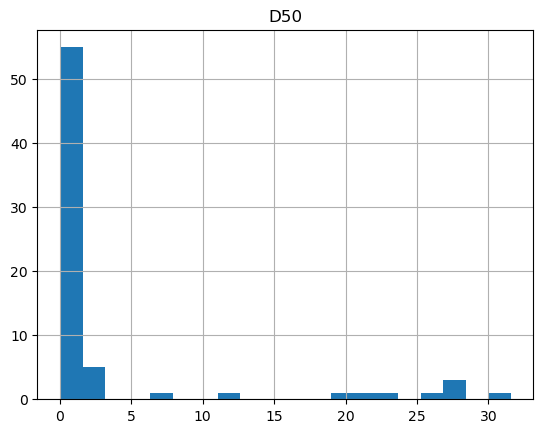

In [27]:
marchett_sample.hist('D50', bins=20)

In [28]:
marchett_sample.to_csv('../../data/marchetti-sample70.csv')